###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     `1266382`


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

## 0. Data preprocess

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# check function runtime
import time

In [2]:
# import datasets
train_data = pd.read_csv("COMP30027_2024_asst1_data/winequality-train.csv")
test_data = pd.read_csv("COMP30027_2024_asst1_data/winequality-test.csv")

train_feature = train_data.iloc[:, :-1]
train_label = train_data['quality']
test_feature = test_data.iloc[:, :-1]
test_label = test_data['quality']

In [3]:
# an accuracy function for finding model accuracy
def accuracy(model_label, test_label):
    hit = 0
    for i in range(len(model_label)):
        if model_label[i] == test_label[i]:
            hit += 1
    return hit / len(model_label)

## 1. K-NN classifier

In [4]:
"""def calculate_distance(instance1, instance2):
    # if len(instance1) != len(instance2):
    #    raise KNNDifferentDimensionError("KNN algorithm can't have instances with different dimension")

    # convert to array for faster calculation
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    sum = 0
    for i in range(len(instance1) - 1):
        sum += (instance1[i + 1] - instance2[i + 1]) ** 2
    return np.sqrt(sum)"""


def handmadeKNN(k, train_feature, train_label, test_feature):

    """
    calculate the Euclidean distance and find the k-nearest neighbors to label it
    tiebreak using closest label
    same distance, tiebreak by random choice
    input the choice of K, train features dataframe, train labels dataframe, test features dataframe
    outputs the test labels
    """

    # vectorize for better parallel calculation
    train_featureNP = train_feature.to_numpy()
    test_featureNP = test_feature.to_numpy()
    train_labelNP = train_label.to_numpy()

    test_labels = []
    
    for test_instanceNP in test_featureNP:
        # finding all distances in traning dataset to a test instance
        diff = train_featureNP - test_instanceNP
        sq_sum = np.sum(diff ** 2, axis=1)
        distances = np.sqrt(sq_sum)
    
        # filter out the k nearest distance's index, and find their label
        knn_index = np.argsort(distances)[:k]
        klabel = train_labelNP[knn_index]
        label_count = np.bincount(klabel)
        if len(label_count) == 1:
            test_label = 0
        # tiebreak
        else:
            if label_count[0] == label_count[1]:
                if distances[knn_index[0]] == distances[knn_index[1]]:
                    test_label = klabel[random.choice([0, 1])]
                else:
                    test_label = klabel[0]
            else:
                # no tie
                test_label = np.argmax(label_count)
            
        test_labels.append(test_label)
    
    return np.array(test_labels)



### 1.1 an accuracy vs K chart

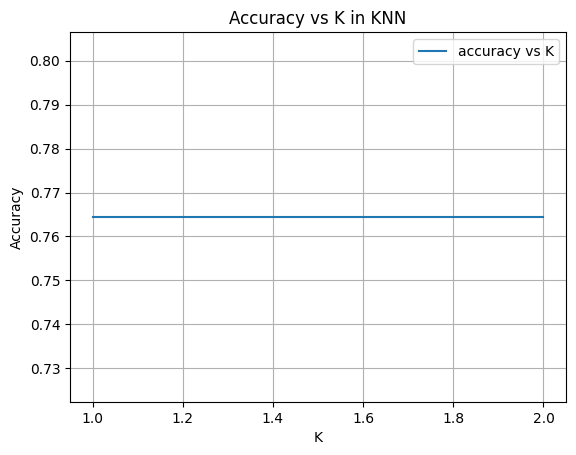

time used: 0.3335578441619873


In [28]:
# this part is an extension to help me writing report
# a simple timing to test performance
krange = 2

start = time.time()

# finding a graphical display for K change affect accuracy
x_values = np.arange(1, krange + 1)

y_values = np.zeros(krange)

for i in range(krange):
    y_values[i] = accuracy(handmadeKNN(i + 1, train_feature, train_label, test_feature), test_label)

plt.plot(x_values, y_values, label='accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K in KNN')
plt.legend()
plt.grid(True)
plt.show()

end = time.time()
print("time used:", end - start)

## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [5]:
print("Accuracy of K = 1 is: " + str(accuracy(handmadeKNN(1, train_feature, train_label, test_feature), test_label)))

Accuracy of K = 1 is: 0.7644444444444445


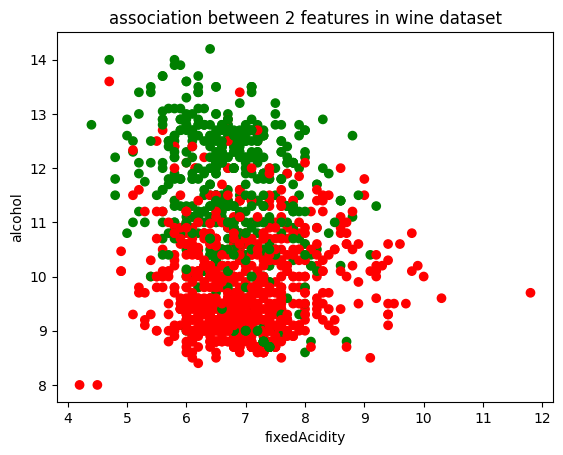

In [23]:
# pick the first 2 feature

colors = ['red' if label == 0 else 'green' for label in train_label]
plt.scatter(train_data['fixedAcidity'], train_data['alcohol'], c=colors)
plt.xlabel('fixedAcidity')
plt.ylabel('alcohol')
plt.title('association between 2 features in wine dataset')
plt.show()


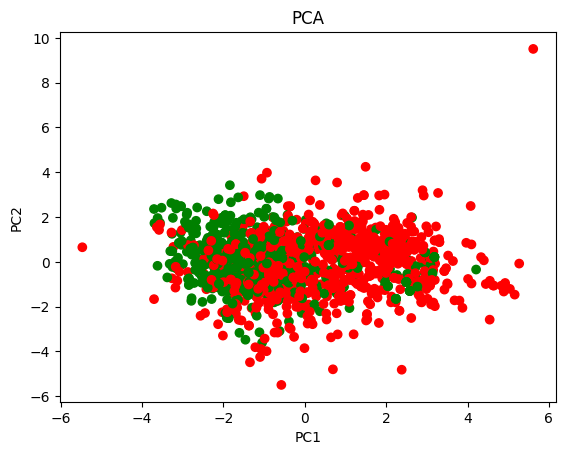

In [24]:
# PCA to support my argument

features = train_feature.to_numpy()
labels = train_label.to_numpy()

# PCA
features = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)


pca_features_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

# color label
pca_features_df['quality'] = labels
colors = ['red' if label == 0 else 'green' for label in train_label]

plt.scatter(pca_features_df['PC1'], pca_features_df['PC2'], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')

plt.show()

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

In [ ]:
# N/A

### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

In [ ]:
# N/A

### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

In [ ]:
# N/A

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.